In [708]:
# Authors:  Eddie F. Carrizales and Jesper S. Bajwa
# Date:  09/22/2022

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import numpy as np

# Accessing public google drive file
url='https://drive.google.com/file/d/1aSPL-6CFXTMxeA1kIF18hRlNOdyvyrDT/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id


In [709]:
# Reading the data file into a Pandas dataframe 'df' and adding the column names
# Notes: 
# -If the data does not have column names, you can find the column names from the attribute 
#   information where you got the data from and add them below as names = ["column1", "column2", "column3", "etc"].
# -If the data is written together with a seperator/delimiter (such as a comma or semicolon), you can seperate the
#   data using sep = "delimiter here" as I have done below.
original_df = pd.read_csv(dwn_url, names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                                            "acceleration", "model year", "origin", "car name"])

In [710]:
# Displays our data in rows x columns with the column names (if no column names, then you must manually add as we did above)
original_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [711]:
# pre-processing dataset
#   -We removed null entries that did not have complete data
#   -There are no redundant columns that need to be removed
#   -We removed categorical/unnecesary columns like the car names
#   -Since we are going to train our data to predict mpg we went ahead and moved that to the last column position

# Remove any entries that do not have complete data
df_clean = original_df.dropna(axis = 'rows', how = 'any')

# Remove unnecessary column 'car name'
df_clean = df_clean.drop(columns = ['car name'])

# Move target variable columns 'mgp' to the last column position
df_clean = df_clean.iloc[:, [1,2,3,4,5,6,7,0]]

In [712]:
# Displays our clean dataset
df_clean

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
401,4,140.0,86.0,2790,15.6,82,1,27.0
402,4,97.0,52.0,2130,24.6,82,2,44.0
403,4,135.0,84.0,2295,11.6,82,1,32.0
404,4,120.0,79.0,2625,18.6,82,1,28.0


In [713]:
# Normalize data
mms = MinMaxScaler()

df_clean_normed = df_clean.copy()
df_clean_normed[['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']] = mms.fit_transform(df_clean_normed[['displacement', 'horsepower', 'weight', 'acceleration', 'mpg']])

In [714]:
# Displays our clean normalized dataset
df_clean_normed

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,0.617571,0.456522,0.536150,0.238095,70,1,0.239362
1,8,0.728682,0.646739,0.589736,0.208333,70,1,0.159574
2,8,0.645995,0.565217,0.516870,0.178571,70,1,0.239362
3,8,0.609819,0.565217,0.516019,0.238095,70,1,0.186170
4,8,0.604651,0.510870,0.520556,0.148810,70,1,0.212766
...,...,...,...,...,...,...,...,...
401,4,0.186047,0.217391,0.333711,0.452381,82,1,0.478723
402,4,0.074935,0.032609,0.146583,0.988095,82,2,0.930851
403,4,0.173127,0.206522,0.193365,0.214286,82,1,0.611702
404,4,0.134367,0.179348,0.286929,0.630952,82,1,0.505319


In [715]:
df_clean_normed.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,0.326646,0.317768,0.386897,0.448888,75.979592,1.576531,0.384200
std,1.705783,0.270398,0.209191,0.240829,0.164218,3.683737,0.805518,0.207580
min,3.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,0.000000
25%,4.000000,0.095607,0.157609,0.173589,0.343750,73.000000,1.000000,0.212766
50%,4.000000,0.214470,0.258152,0.337539,0.446429,76.000000,1.000000,0.365691
75%,8.000000,0.536822,0.434783,0.567550,0.537202,79.000000,2.000000,0.531915
max,8.000000,1.000000,1.000000,1.000000,1.000000,82.000000,3.000000,1.000000


In [716]:
# Next we will use different plots to familiarize with our data and learn how it is distributed

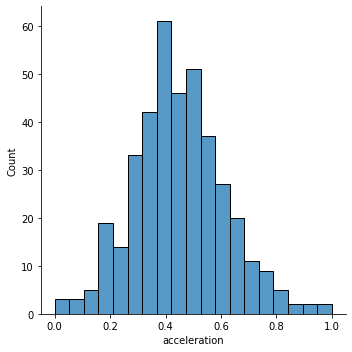

In [717]:
sns.displot(df_clean_normed['acceleration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


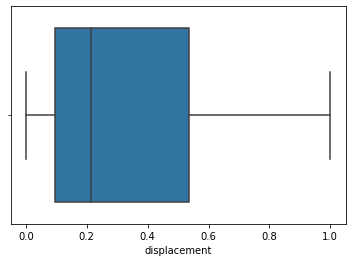

In [718]:
sns.boxplot(df_clean_normed['displacement'])

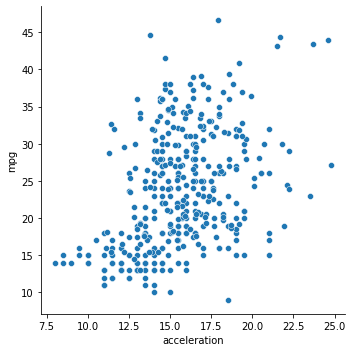

In [719]:
#displacement, horsepower,weight, acceleration
sns.relplot(data = df_clean, x = "acceleration", y = "mpg")

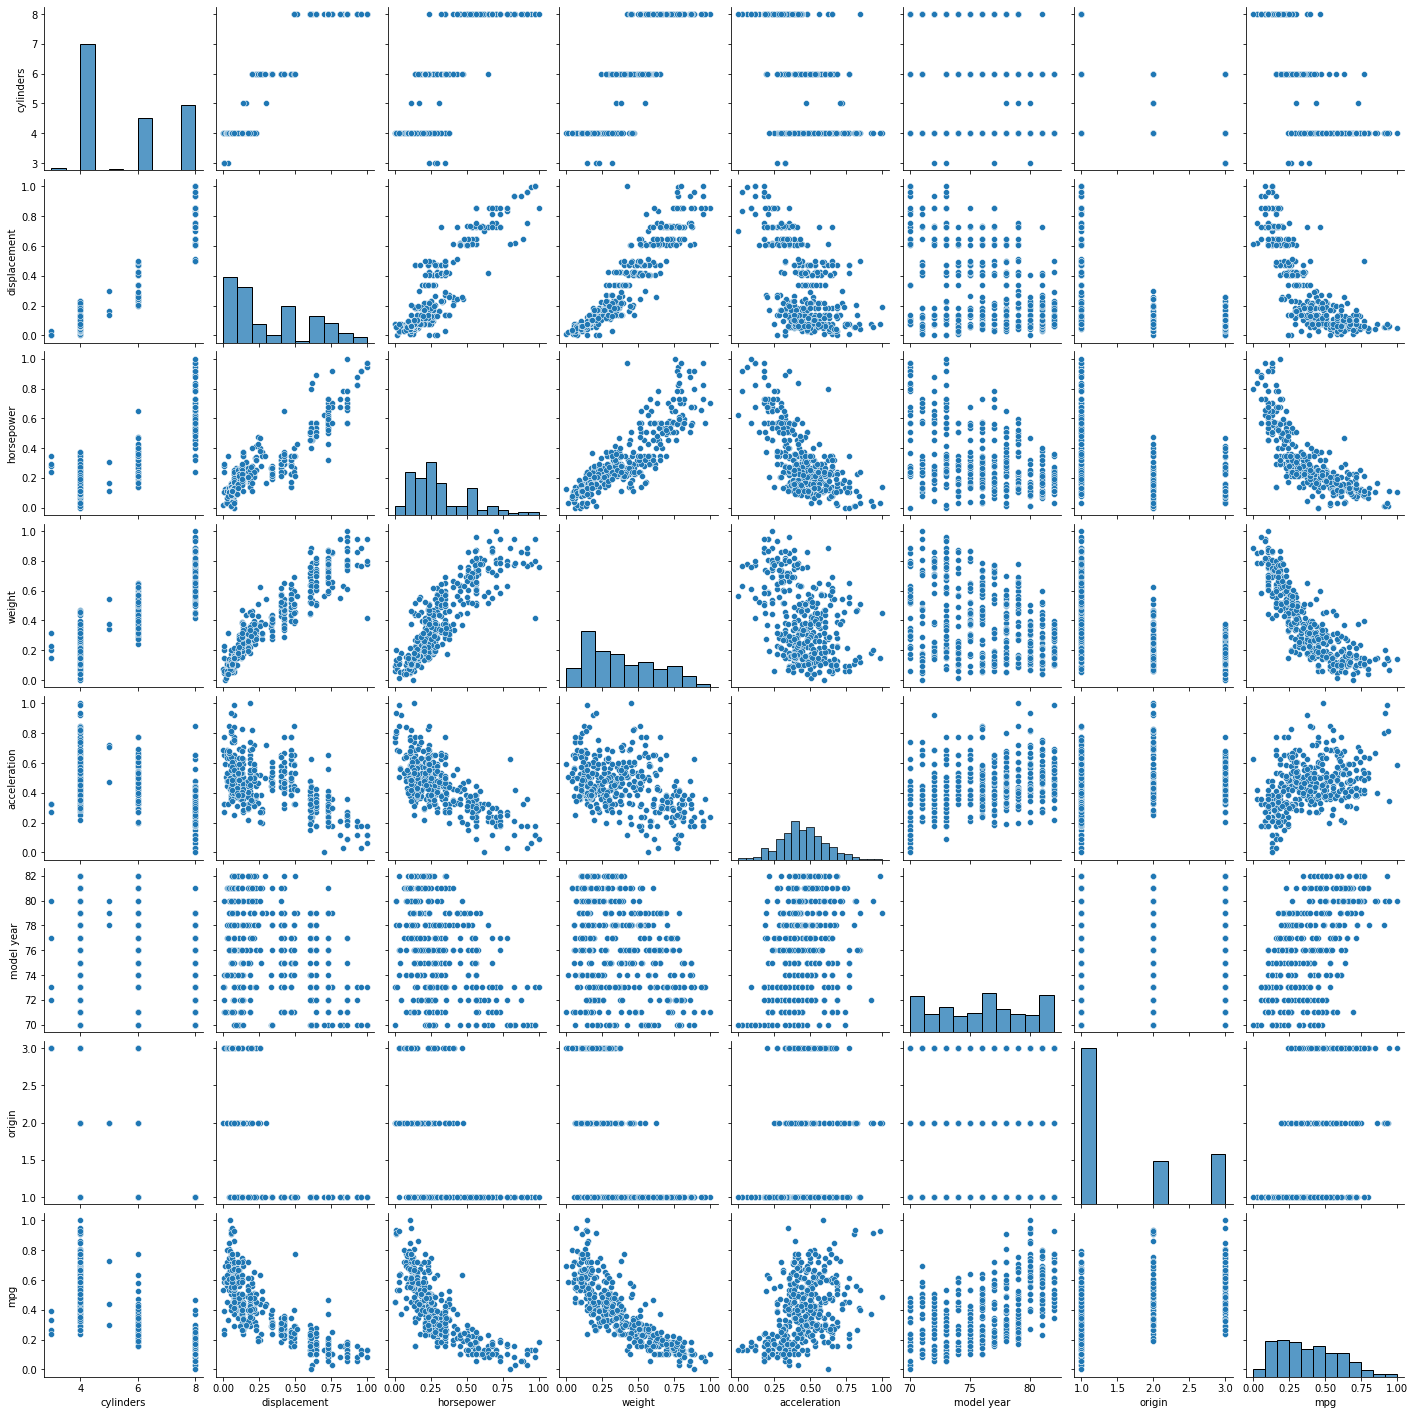

In [720]:
sns.pairplot(data = df_clean_normed)

In [721]:
# The thing we are trying to predict is the quality of the wine.
# Using this corr() function, we are able to see the correlation that each of the columns have to
#   the quality of the wine.
# As we can see, there are positive and negative values describing how strongly the correlate with
#   the quality which has a value of 1.0, from this data we want to pick the columns that have an absolute
#   value which is closest to 1.0 (i.e., correlates the strongest)
# Note: In this case they all have somewhat high correlation, thus we will keep all the columns
df_clean_normed.corr()["mpg"]

cylinders      -0.777618
displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
model year      0.580541
origin          0.565209
mpg             1.000000
Name: mpg, dtype: float64

In [722]:
# Creating Train Test split 80/20
X = df_clean_normed[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df_clean_normed['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [723]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [724]:
#Add column of onese to feature vector X_train for matrix multiplication purposes
X_train = np.hstack((np.ones((len(X_train),1)), X_train))

#Add column of onese to feature vector X_test for matrix multiplication purposes
X_test = np.hstack((np.ones((len(X_test),1)), X_test))

In [725]:
# Construct a linear regression model (that uses multiple attributes) using the training data
#   and using the gradient descent

# Linear regression works by minimizing the error between the equation of the line (y = m*x + b) and all the points
#   This is done using a loss/cost/error Function, to calculate this we:
#     1. calculate the difference between actual value of y and predicted value of y
#     2. Square the difference calculated
#     3. Find the mean of the squares

# 4. After this, we minimize the cost function using gradient descent
# The Gradient Descent Algorithm is basically an iterative optimization algorithm to find the minimum of a function (in this case MSE)

def compute_cost(X, y, m):
  predictions = X.dot(m)

  error = np.subtract(predictions, y) # step 1.

  #Our cost function
  J = 1/(2 * len(X)) * np.sum(np.square(error)) # steps 2 & 3

  return J

# gradient, start, step, num of iterations, threshold (how close we want to get to 0 i.e., 0.001)
def gradient_descent(X, y, start, learn_rate, n_iter=50, tolerance = 1e-06):
  cost_history = np.zeros(n_iter)
  vector = start
  for i in range (n_iter):
    predictions = X.dot(vector)
    error = np.subtract(predictions, y)
    diff =  - (learn_rate / len(X)) * X.T.dot(error)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    cost_history[i] = compute_cost(X,y,vector) # call to compute cost function
  return vector, cost_history
  

In [729]:
#Gradient Descent Parameters
start = [0,0,0,0,0,0,0,0]
learn_rate = 0.0003433
n_iter = 100000

model , cost_history = gradient_descent(X_train, y_train, start, learn_rate, n_iter) # call to gradient descent function

print(model)

[-0.05606802 -0.04905941 -0.0455823  -0.1096933  -0.14864499 -0.02317803
  0.0104154   0.02254382]


In [730]:
# create a cost column
ch = pd.DataFrame(cost_history)
ch.columns = ["Cost"]
ch

,Cost
0,0.093901
1,0.092615
2,0.091350
3,0.090106
4,0.088883
...,...
99995,0.005277
99996,0.005277
99997,0.005277
99998,0.005277


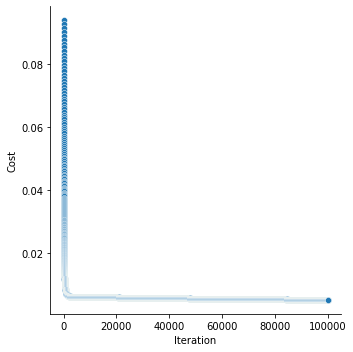

In [731]:
plot = sns.relplot(data = ch, x = range(0,len(ch)), y="Cost")
plot.set_xlabels("Iteration", clear_inner=False)

In [732]:
# Training using the X_train data using the model
y_train_predict = X_train.dot(model)

In [737]:
# Model Evaluation for training set using RMSE, MSE, and R^2
rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
mse_train = (mean_squared_error(y_train, y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

print("The model performance for the training set")
print("------------------------------------------")
print("Training RMSE is {:.4f}".format(rmse_train))
print("Training MSE is {:.4f}".format(mse_train))
print("Training R2 score {:.4f}".format(r2_train))

The model performance for the training set
------------------------------------------
Training RMSE is 0.1027
Training MSE is 0.0106
Training R2 score 0.7527


In [738]:
# Testing the model using the X_test data and getting the Y predictions
y_test_predict = X_test.dot(model)

In [739]:
# Model Evaluation for testing set using RMSE, MSE, and R^2
rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
mse_test = (mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print("The model performance for the test set")
print("------------------------------------------")
print("Test RMSE is {:.4f}".format(rmse_test))
print("Test MSE is {:.4f}".format(mse_test))
print("Test R2 score {:.4f}".format(r2_test))
print("\n")

The model performance for the test set
------------------------------------------
Test RMSE is 0.0948
Test MSE is 0.0090
Test R2 score 0.7965




In [740]:
# Printing parameters and evaluation (trial) data for log
print(f"Parameters: Start = [0,0,0,0,0,0,0,0], Learning_rate = {learn_rate}, n_iterations = {n_iter}")
print(f"Evaluation of training set: RMSE = {rmse_train}, R^2 = {r2_train}, MSE = {mse_train}")
print(f"Evaluation of testing set: RMSE = {rmse_test}, R^2 = {r2_test}, MSE = {mse_test}")

Parameters: Start = [0,0,0,0,0,0,0,0], Learning_rate = 0.0003433, n_iterations = 100000
Evaluation of training set: RMSE = 0.10273503462156482, R^2 = 0.7527165315207134, MSE = 0.010554487338694121
Evaluation of testing set: RMSE = 0.09480051552645286, R^2 = 0.7964817066730212, MSE = 0.00898713774408123


In [741]:
# Predictions table with actual mpg and predicted mpg columns
predictions_df = pd.DataFrame()
predictions_df['Actual mpg'] = y_test
predictions_df['Predicted mpg'] = y_test_predict
predictions_df

,Actual mpg,Predicted mpg
317,0.773936,0.607876
353,0.619681,0.610468
400,0.478723,0.519115
359,0.555851,0.549178
307,0.396277,0.252225
...,...,...
323,0.268617,0.371354
82,0.132979,0.120340
224,0.558511,0.514666
362,0.656915,0.603101
